In [15]:
import pandas as pd
from textblob import TextBlob
from datetime import datetime, timezone

In [48]:
bernie = pd.concat([pd.read_csv(f) for f in ['bern2015-02-20.csv', 'bernie-2015-03-23T00:00:00+01:00.csv', 'bernie-2016-12-01T00:00:00+01:00.csv']])
cruz = pd.read_csv("cruz-2016-12-01T00:00:00+01:00.csv")

In [33]:
bernie

,created_at,id,text
0,2015-01-01T16:29:58.000Z,550690405990166528,Sanders Speaks: Bernie Wants to Break Up the B...
1,2015-01-01T15:32:07.000Z,550675845808152576,Today's news from Sen. Bernie Sanders (I-Vt.):...
2,2015-01-01T00:41:59.000Z,550451838030315521,Bernie Sanders Exposes 18 CEOs who took Trilli...
3,2015-01-01T07:48:55.000Z,550559279154221057,Bernie Sanders Exposes 18 CEOs who took Trilli...
4,2015-01-01T21:53:41.000Z,550771869641879553,Via Senator Bernie Sanders on fb and @SenSande...
...,...,...,...
2834046,2016-11-30T15:25:53.000Z,803983397387284480,@Glambertoo1 @TruthYoda @1stBlackRascal @SLind...
2834047,2016-11-30T17:43:19.000Z,804017982254956545,"Sanders: Trump's tweets delusional, insane: Be..."
2834048,2016-11-30T18:34:28.000Z,804030855337349121,"Sanders: Trump's tweets delusional, insane: Be..."
2834049,2016-11-30T20:19:00.000Z,804057159059329024,Bernie Sanders'ın eğer bir şansı daha olacaksa...


In [4]:
cruz

,created_at,id,text
0,2015-01-01T05:06:24.000Z,550518378885300224,BREAKING: 2015 delayed as Ted Cruz mounts fili...
1,2015-01-01T17:05:07.000Z,550699249160450048,"""There’s a simple trend here underlying all of..."
2,2015-01-01T19:29:00.000Z,550735460327518208,'In Defense of Christians' Hezbollah Front Gro...
3,2015-01-01T22:53:25.000Z,550786902346186753,Ted Cruz: Dems Have Become an Extreme Party ht...
4,2015-01-01T20:14:48.000Z,550746987100778496,Ted Cruz: Horse's Ass Of 2014: Via Right Wing ...
...,...,...,...
3331842,2016-11-30T16:31:08.000Z,803999816317620224,RT @Dlw20161950: Dear All Republicans In Polit...
3331843,2016-11-30T16:26:47.000Z,803998719997857792,RT @DonnyFerguson: You should track down that ...
3331844,2016-11-30T13:12:03.000Z,803949714328563712,Ted Cruz Wants to Stir Up a Grassroots Tsunami...
3331845,2016-11-30T07:21:41.000Z,803861544287158273,"Ted Cruz, notable human man, launches investig..."


For our Regression Discontinuity, the dependent variable is going to be Tweet sentiment, and the 'cutoffs' are the different memes.

End Data Goal:

Have average sentiment grouped by day

Things we need to do to clean the data:
- remove any duplicates
- format the date to datetime
- perform sentiment analysis (get polarity)
- groupby day average
- create dummy variables for meme vs not meme

In [49]:
def format_date(date):
    year_month_day = date.split('T')[0].split('-')
    year = int(year_month_day[0])
    month = int(year_month_day[1])
    day = int(year_month_day[2])
    return datetime(year, month, day)

def get_sentiment(text:str):
    return TextBlob(text).sentiment.polarity

def clean_data(df: pd.DataFrame):
    df = df.drop_duplicates(subset='id', keep='first')
    
    # format to datetime
    df['created_at'] = df['created_at'].apply(format_date)
    df['polarity'] = df['text'].apply(get_sentiment)
        
    dfg = df.groupby('created_at').mean('polarity')
    
    
    return df, dfg

In [50]:
cruz, cruz_grouped = clean_data(cruz)
bernie, bernie_grouped = clean_data(bernie)

/var/folders/2y/hdx3x2z50hq28dwpln9gpnqw0000gn/T/ipykernel_6228/1608257482.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['created_at'] = df['created_at'].apply(format_date)
/var/folders/2y/hdx3x2z50hq28dwpln9gpnqw0000gn/T/ipykernel_6228/1608257482.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'] = df['text'].apply(get_sentiment)
/var/folders/2y/hdx3x2z50hq28dwpln9gpnqw0000gn/T/ipykernel_6228/1608257482.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [51]:
bernie_grouped = bernie_grouped.reset_index()
cruz_grouped = cruz_grouped.reset_index()

In [54]:
cruz_grouped

,created_at,id,polarity
0,2014-12-31,5.504343e+17,0.214352
1,2015-01-01,5.506251e+17,0.039587
2,2015-01-02,5.510206e+17,0.042578
3,2015-01-03,5.513627e+17,0.022991
4,2015-01-04,5.517273e+17,0.034302
...,...,...,...
696,2016-11-26,8.025292e+17,0.034061
697,2016-11-27,8.028878e+17,0.017754
698,2016-11-28,8.031981e+17,0.040404
699,2016-11-29,8.036053e+17,0.012326


In [55]:
import matplotlib.pyplot as plt

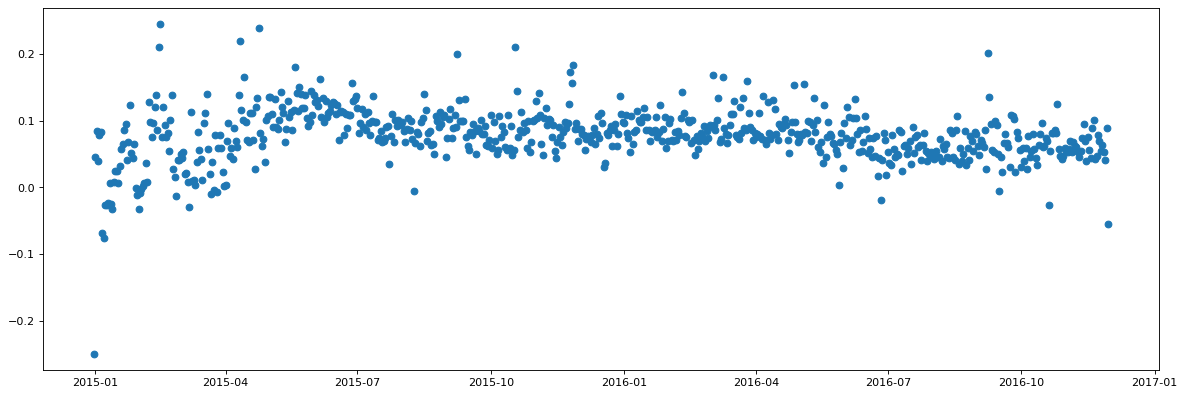

In [57]:
plt.figure(figsize=(18, 6), dpi=80)
plt.scatter(bernie_grouped['created_at'], bernie_grouped['polarity'])
plt.show()

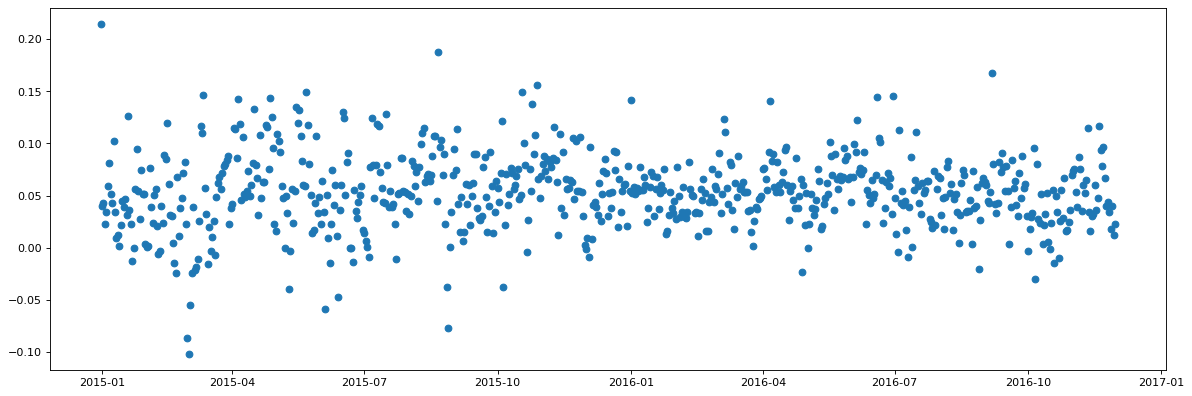

In [58]:
plt.figure(figsize=(18, 6), dpi=80)
plt.scatter(cruz_grouped['created_at'], cruz_grouped['polarity'])
plt.show()

## Meme Work

Bird on Podium (Bernie Sanders): 2016-03-16 -> 2016-06-16

In [59]:
import numpy as np

In [68]:
meme_start = datetime(2016,2,16)
meme_end = datetime(2016,6,16)
meme_peak = datetime(2016,4,2)
def is_meme(date):
    if date >= meme_start and date<=meme_end:
        return 1
    return 0
bernie_grouped['meme'] = bernie_grouped['created_at'].apply(is_meme)

In [69]:
bird_o_p = bernie_grouped[bernie_grouped['meme'] > 0]

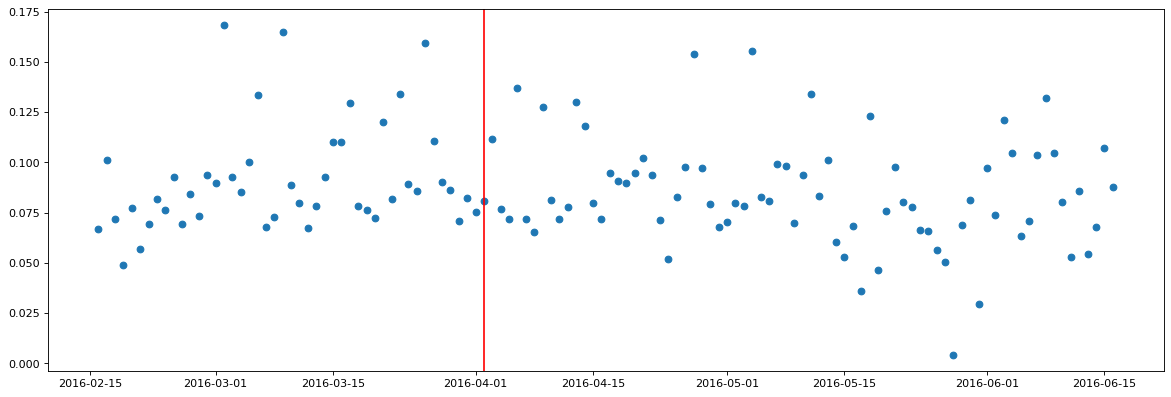

In [70]:
plt.figure(figsize=(18, 6), dpi=80)
plt.scatter(bird_o_p['created_at'], bird_o_p['polarity'])
plt.axvline(x=meme_peak, color = 'r')
plt.show()

In [71]:
import numpy as np

In [72]:
X = bird_o_p[bird_o_p['created_at'] < meme_peak]['created_at']
Y = bird_o_p[bird_o_p['created_at'] < meme_peak]['polarity']

In [84]:
X = np.linspace(0,1,len(X))
coeffs = np.polyfit(X, Y, 1)
poly_eqn = np.poly1d(coeffs)
y_hat = poly_eqn(X)


46

In [86]:
X_ = bird_o_p[bird_o_p['created_at'] > meme_peak]['created_at']
Y_ = bird_o_p[bird_o_p['created_at'] > meme_peak]['polarity']

X_ = np.linspace(0,1,len(X_))
coeff = np.polyfit(X_, Y_, 1)
poly_eq = np.poly1d(coeff)
y_ha = poly_eq(X_)

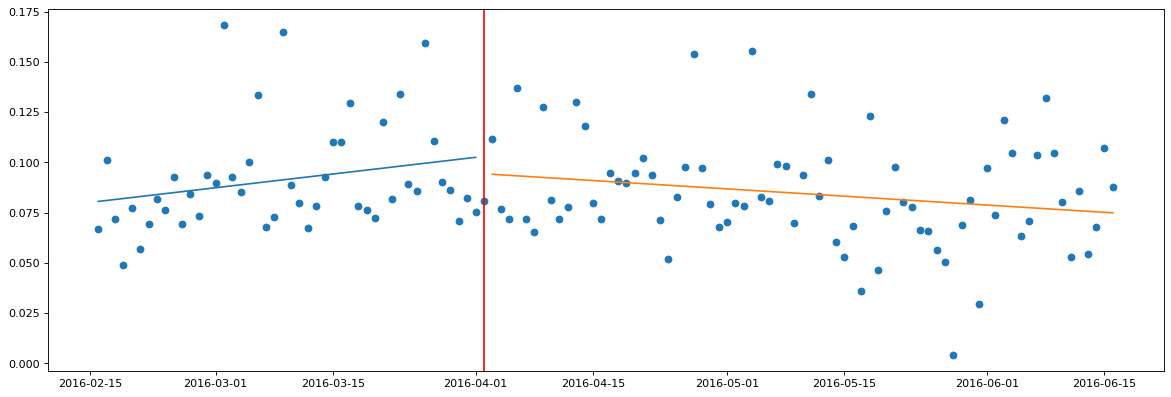

In [87]:
plt.figure(figsize=(18, 6), dpi=80)
plt.scatter(bird_o_p['created_at'], bird_o_p['polarity'])
plt.plot(bird_o_p[bird_o_p['created_at'] < meme_peak]['created_at'], y_hat)
plt.plot(bird_o_p[bird_o_p['created_at'] > meme_peak]['created_at'], y_ha)

plt.axvline(x=meme_peak, color = 'r')
plt.show()

In [88]:
bird_o_p.to_csv("birdiesanders.csv")